In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data (1).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "covid_19_data.csv" with length 7557698 bytes


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['covid_19_data.csv'].decode('utf-8')),parse_dates=['Last Update'])
print(df)

           SNo ObservationDate     Province/State  ... Confirmed  Deaths  Recovered
0            1      01/22/2020              Anhui  ...       1.0     0.0        0.0
1            2      01/22/2020            Beijing  ...      14.0     0.0        0.0
2            3      01/22/2020          Chongqing  ...       6.0     0.0        0.0
3            4      01/22/2020             Fujian  ...       1.0     0.0        0.0
4            5      01/22/2020              Gansu  ...       0.0     0.0        0.0
...        ...             ...                ...  ...       ...     ...        ...
107151  107152      09/10/2020  Zaporizhia Oblast  ...    2081.0    30.0     1049.0
107152  107153      09/10/2020            Zeeland  ...    1101.0    72.0        0.0
107153  107154      09/10/2020           Zhejiang  ...    1278.0     1.0     1268.0
107154  107155      09/10/2020    Zhytomyr Oblast  ...    3938.0    79.0     2309.0
107155  107156      09/10/2020       Zuid-Holland  ...   22016.0  1353.0    

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from fbprophet import Prophet

In [ ]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [ ]:
df_country = df.groupby(['Country'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [ ]:
Cntry = df.loc[df['Country'] == 'India']

In [ ]:
Cntry.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
107085,107086,09/10/2020,Tripura,India,2020-09-11 04:46:23,17811.0,173.0,10255.0
107098,107099,09/10/2020,Unknown,India,2020-09-11 04:46:23,0.0,0.0,0.0
107107,107108,09/10/2020,Uttar Pradesh,India,2020-09-11 04:46:23,292029.0,4206.0,221506.0
107108,107109,09/10/2020,Uttarakhand,India,2020-09-11 04:46:23,28266.0,377.0,18783.0
107134,107135,09/10/2020,West Bengal,India,2020-09-11 04:46:23,193175.0,3771.0,166027.0


In [ ]:
Cntry_date = Cntry.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [ ]:
date_x_ticks = []
#country_x_ticks = []
date_confirmed=[]
date_deaths=[]
date_recovered=[]

In [ ]:
for index, row in Cntry_date.iterrows():
  date_x_ticks.append(row['Date'])
  date_confirmed.append(row['Confirmed'])
  date_deaths.append(row['Deaths'])
  date_recovered.append(row['Recovered'])

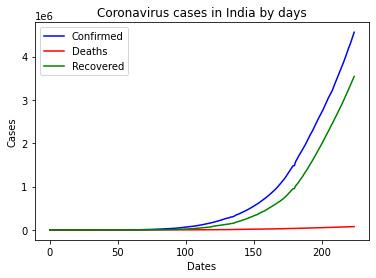

In [ ]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed, label='Confirmed', color='blue')
plt.plot(date_deaths, label='Deaths', color='red')
plt.plot(date_recovered, label='Recovered', color='green')
plt.title('Coronavirus cases in India by days')
plt.legend()
plt.show()

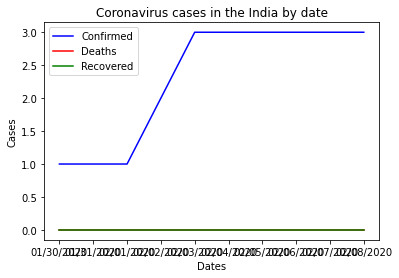

In [ ]:
plt.xticks(np.arange(len(date_x_ticks[:10])), date_x_ticks[:10])
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed[:10], label='Confirmed', color='blue')
plt.plot(date_deaths[:10], label='Deaths', color='red')
plt.plot(date_recovered[:10], label='Recovered', color='green')
plt.title('Coronavirus cases in the India by date')
plt.legend()
plt.show()

In [ ]:
date_confirmed_prophet = Cntry_date[['Date', 'Confirmed']]
date_death_prophet = Cntry_date[['Date', 'Deaths']]
date_recovered_prophet = Cntry_date[['Date', 'Recovered']]

date_confirmed_prophet.columns = ['ds', 'y']
date_death_prophet.columns = ['ds', 'y']
date_recovered_prophet.columns = ['ds', 'y']

In [ ]:
model_confirmed = Prophet(interval_width=0.99)
model_confirmed.fit(date_confirmed_prophet)
future_confirmed = model_confirmed.make_future_dataframe(periods=30)
forecast_confirmed = model_confirmed.predict(future_confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_confirmed_yhat = []
forecast_confirmed_yhat_u = []

forecast_confirmed_yhat_l = []

for index, row in forecast_confirmed.iterrows():
  forecast_confirmed_yhat.append(row['yhat'])
  forecast_confirmed_yhat_l.append(row['yhat_lower'])
  forecast_confirmed_yhat_u.append(row['yhat_upper'])

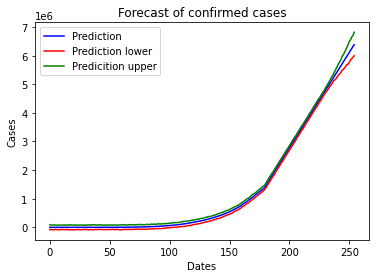

In [ ]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_confirmed_yhat, label='Prediction', color='blue')
plt.plot(forecast_confirmed_yhat_l, label='Prediction lower', color='red')
plt.plot(forecast_confirmed_yhat_u, label='Predicition upper', color='green')
plt.title('Forecast of confirmed cases')
plt.legend()
plt.show()

In [ ]:
model_death = Prophet(interval_width=0.99)
model_death.fit(date_death_prophet)
future_death = model_death .make_future_dataframe(periods=30)
forecast_death = model_death.predict(future_death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_death_yhat = []
forecast_death_yhat_u = []

forecast_death_yhat_l = []

for index, row in forecast_death.iterrows():
  forecast_death_yhat.append(row['yhat'])
  forecast_death_yhat_l.append(row['yhat_lower'])
  forecast_death_yhat_u.append(row['yhat_upper'])

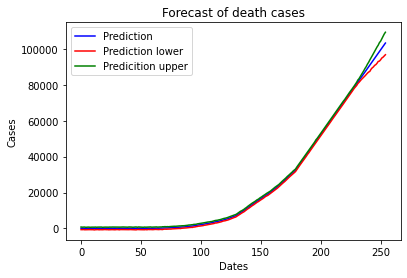

In [ ]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_death_yhat, label='Prediction', color='blue')
plt.plot(forecast_death_yhat_l, label='Prediction lower', color='red')
plt.plot(forecast_death_yhat_u, label='Predicition upper', color='green')
plt.title('Forecast of death cases')
plt.legend()
plt.show()

In [ ]:
model_recovered = Prophet(interval_width=0.99)
model_recovered.fit(date_recovered_prophet)
future_recovered = model_recovered.make_future_dataframe(periods=30)
forecast_recovered = model_recovered.predict(future_recovered)

dates_forecast_recovered = []
forecast_recovered_yhat = []
forecast_recovered_yhat_u = []
forecast_recovered_yhat_l = []

for index, row in forecast_recovered.iterrows():
  dates_forecast_recovered.append(row['ds'])
  forecast_recovered_yhat.append(row['yhat'])
  forecast_recovered_yhat_l.append(row['yhat_lower'])
  forecast_recovered_yhat_u.append(row['yhat_upper'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


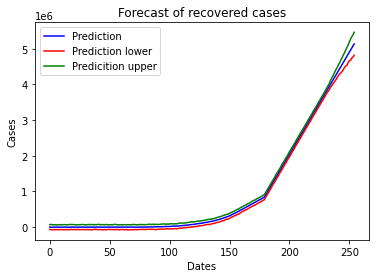

In [ ]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_recovered_yhat, label='Prediction', color='blue')
plt.plot(forecast_recovered_yhat_l, label='Prediction lower', color='red')
plt.plot(forecast_recovered_yhat_u, label='Predicition upper', color='green')
plt.title('Forecast of recovered cases')
plt.legend()
plt.show()

In [ ]:
from matplotlib import pyplot as plt

from statsmodels.tsa.ar_model import AR

import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
date_confirmed = Cntry_date[['Date', 'Confirmed']]
date_death = Cntry_date[['Date', 'Deaths']]
date_recovered = Cntry_date[['Date', 'Recovered']]

In [ ]:
for index, row in date_confirmed.iterrows():
  if row['Confirmed'] is None:
    row['Confirmed'] = 0.0

for index, row in date_death.iterrows():
  if row['Deaths'] is None:
    row['Deaths'] = 0.0

for index, row in date_recovered.iterrows():
  if row['Recovered'] is None:
    row['Recovered'] = 0.0

[1.56318736e+00 1.44876141e+00 9.66993982e-01 2.28236955e+00
 3.75832482e+00 3.42022667e+00 2.95250880e+00 2.91085637e+00
 2.95373779e+00 2.83937897e+00 3.00712151e+00 3.64082089e+00
 2.87709470e+00 2.77474983e+00 3.46362092e+00 3.31006580e+00
 2.62020390e+00 2.77418805e+00 3.00120540e+00 3.00060393e+00
 3.00000949e+00 3.00189232e+00 3.00003151e+00 3.53601945e+00
 2.82163187e+00 2.73869929e+00 3.54357200e+00 3.36312499e+00
 2.55425003e+00 2.73469704e+00 3.00000000e+00 3.00000000e+00
 5.66393047e+00 5.97614653e+00 3.56352004e+01 4.18896156e+01
 3.23081118e+01 3.54839690e+01 4.21240460e+01 4.67682273e+01
 6.22678411e+01 7.03367439e+01 7.95800572e+01 9.12693490e+01
 1.12728928e+02 1.36465386e+02 1.23788534e+02 1.47593315e+02
 1.72645424e+02 2.15052520e+02 2.79544856e+02 3.87166313e+02
 4.59761756e+02 5.66620839e+02 5.99658790e+02 7.21628071e+02
 8.08918948e+02 9.82867578e+02 1.10236337e+03 1.08073920e+03
 1.35543377e+03 1.57211569e+03 2.29245757e+03 3.02822638e+03
 2.85867514e+03 3.252702

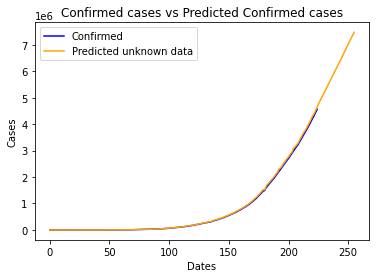

In [ ]:
#SARIMA model
model_sarima_confirmed = SARIMAX(np.asanyarray(date_confirmed['Confirmed']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_confirmed = model_sarima_confirmed.fit(disp=False, enforce_stationarity=False)
predict_sarima_confirmed = model_fit_sarima_confirmed.predict(1, len(date_confirmed)+31)
print(predict_sarima_confirmed)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predict_sarima_confirmed, label='Predicted unknown data', color='orange')

plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.20171345e+00 1.00000000e+00 2.20171345e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 3.20171345e+00
 3.00000000e+00 4.20171345e+00 5.20171345e+00 3.79828655e+00
 8.24235766e+00 1.04766050e+01 1.06372173e+01 1.22748916e+01
 2.16137076e+01 2.00000000e+01 2.54440711e+01 2.74766050e+01
 3.36457846e+01 3.61138224e+01 6.18736567e+01 7.68641755e+01
 7.38888287e+01 8.836520

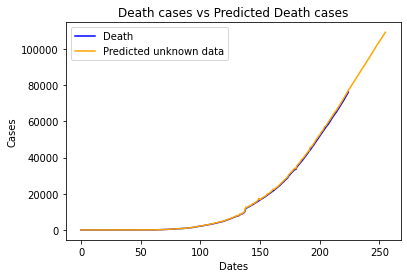

In [ ]:
model_sarima_death = SARIMAX(np.asanyarray(date_death['Deaths']),  order=(1,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_death = model_sarima_death.fit(disp=False, enforce_stationarity=False)
predict_sarima_death = model_fit_sarima_death.predict(1, len(date_death)+31)
print(predict_sarima_death)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_death['Deaths'], label='Death', color='blue')
plt.plot(predict_sarima_death, label='Predicted unknown data', color='orange')
#plt.plot(predict_sarima_death[:len(predict_sarima_death)-31], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.84933392e+00 4.77689988e+00 3.00380295e+00
 3.00560769e+00 3.00006163e+00 3.00007069e+00 3.00000158e+00
 3.00000073e+00 2.99999963e+00 3.00000000e+00 3.00000000e+00
 4.47004886e+00 2.58288540e+00 2.12484899e+00 3.00000000e+00
 3.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
 3.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
 5.81369314e+00 4.16120964e+00 3.08918791e+00 4.00000000e+00
 4.00000000e+00 1.55536780e+01 1.83578893e+01 1.42837420e+01
 1.45953210e+01 1.52837420e+01 2.20140310e+01 2.73178475e+01
 2.59306669e+01 3.71410240e+01 4.76556623e+01 4.74231522e+01
 5.17635937e+01 8.08840742e+01 1.01654714e+02 1.04530655e+02
 1.10733025e+02 1.35436872e+02 1.68078433e+02 2.17208232e+02
 2.21623816e+02 2.410481

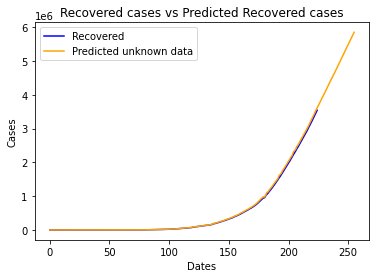

In [ ]:
model_sarima_recovered = SARIMAX(np.asanyarray(date_recovered['Recovered']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_recovered = model_sarima_recovered.fit(disp=False, enforce_stationarity=False)
predict_sarima_recovered = model_fit_sarima_recovered.predict(1, len(date_recovered)+31)
print(predict_sarima_recovered)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_sarima_recovered, label='Predicted unknown data', color='orange')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()